# Exercises - GEO4902-04 - Verification

Kjersti Stangeland, Fall 2024

# Exercise 04-01 - Analysis of point forecast

The script loads the data of two insitu wind and temperature observations and the corresponding model forecast. Note the model temperatures are in Kelvin. The data is stored as pandas dataframes, for example, for the model temperature and time: ```st1_temp.model``` , ```st1_temp.time```

1) Plot as time series the model and observation together in one plot. (for both wind and temperature)
2) Can you find out if the errors are conditional or not? Describe for all four observations/models. (You can look in the lecture slides for more details on conditional errors.)
3) Calculate the bias and root mean square error (RMSE)
4) Remove the bias and compute the RMSE again. 
5) Smooth the time series of the de-biased wind observations. e.g., with
 

```
from scipy.signal import savgol_filter

result = savgol_filter(np.array(st2_wind.model), 25, 2)

result = savgol_filter(np.array(st2_wind.model-bias2_w), 25, 1)
```

 

6) Plot the time series for observations and smoothed and de-biased models. 
7) Recalculate the RMSE values. What changed?
8) Based on this result, why can a coarser resolution model have a lower RMSE, although it is not necessarily more “accurate”? 

In [37]:
# import packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error # used to calculate RMSE
from scipy.signal import savgol_filter
import matplotlib.dates as mdates


In [80]:
# import temperature and wind data
st1_temp = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99735temp.csv") # Edgeøya - Kapp Heuglin, Svalbard                
st2_temp = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99754temp.csv") # Hornsund, Svalbard
st1_wind = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99735wind.csv")                 
st2_wind = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/GEO4902_exercises/master/04/data/99754wind.csv") 

In [81]:
# set time as index 
# drop=True: Delete columns to be used as the new index.
# inplace=True: If True, modifies the DataFrame in place (do not create a new object).
st1_temp.set_index('time', drop=True, inplace=True)
st1_wind.set_index('time', drop=True, inplace=True)
st2_temp.set_index('time', drop=True, inplace=True)
st2_wind.set_index('time', drop=True, inplace=True)

In [83]:
# Convert index to datetime format
st1_wind.index = pd.to_datetime(st1_wind.index)
st1_temp.index = pd.to_datetime(st1_temp.index)

st2_wind.index = pd.to_datetime(st2_wind.index)
st2_temp.index = pd.to_datetime(st2_temp.index)

In [84]:
# Converting model data to Celcius
st1_temp['model'] = st1_temp['model'] - 273.15
st2_temp['model'] = st2_temp['model'] - 273.15

### 1) Plot model and observation as time series (wind and temperature)

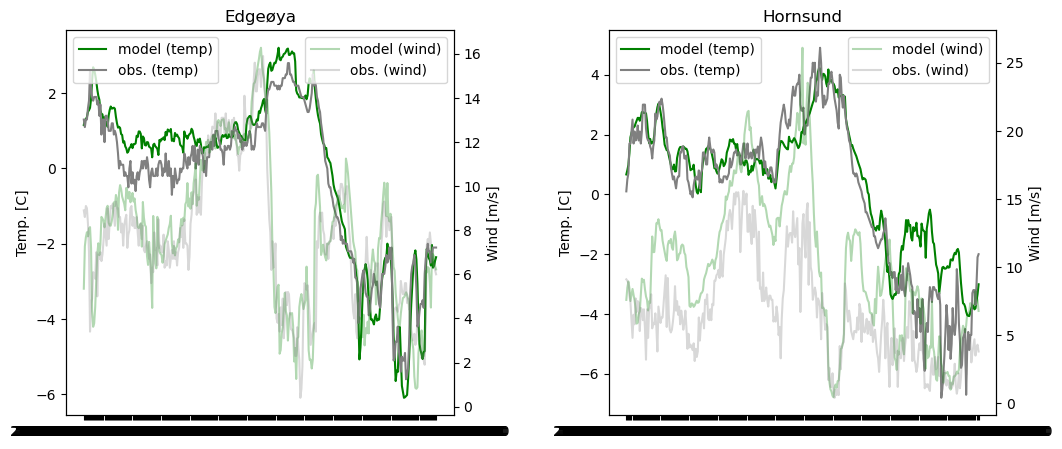

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.4)

# Temperature plot, Edgeøya
ax[0].plot(st1_temp.model, color='green', label='model (temp)')
ax[0].plot(st1_temp.obs, color='gray', label='obs. (temp)')

# Wind plot, Edgeøya
ax0_wind = ax[0].twinx()
ax0_wind.plot(st1_wind.model, color='green', alpha=0.3, label='model (wind)')
ax0_wind.plot(st1_wind.obs, color='gray', alpha=0.3, label='obs. (wind)')

ax[0].set_ylabel('Temp. [C]')
ax0_wind.set_ylabel('Wind [m/s]')
ax[0].set_title('Edgeøya')
ax[0].legend(loc='upper left')
ax0_wind.legend(loc='upper right')

# Temperature plot, Hornsund
ax[1].plot(st2_temp.model, color='green', label='model (temp)')
ax[1].plot(st2_temp.obs, color='gray', label='obs. (temp)')

# Wind plot, Hornsund
ax1_wind = ax[1].twinx()
ax1_wind.plot(st2_wind.model, color='green', alpha=0.3, label='model (wind)')
ax1_wind.plot(st2_wind.obs, color='gray', alpha=0.3, label='obs. (wind)')

ax[1].set_ylabel('Temp. [C]')
ax1_wind.set_ylabel('Wind [m/s]')
ax[1].set_title('Hornsund')
ax[1].legend(loc='upper left')
ax1_wind.legend(loc='upper right')


### 2) Can you find out if the errors are conditional or not? Describe for all four observations/models.

... (__answer here__)

### 3) Calculate the bias and root mean square error (RMSE)